#                                                     COVID 19 - Data Analysis

## Table of Contents¶

### * Introduction
### * Data set accessing
### * Data Cleaning
### * Data Visualisations
### * Conclusion

## **Introduction

### In this session, I will use various methods of exploratory data analysis to examine the characteristics of the "COVID 19" dataset.

### The data contains 67 variables used to explore the effect of various factors on Covid-19. 
### Some of the variables are:
#####   'continent', 'location', 'date', 'total_cases', 'new_cases','new_cases_smoothed', 'total_deaths', 'new_deaths','new_deaths_smoothed', 'total_cases_per_million','new_cases_per_million', 'new_cases_smoothed_per_million','total_deaths_per_million', 'new_deaths_per_million','new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients','icu_patients_per_million', 'hosp_patients',
       
       
       
       
       

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data set accessing

In [2]:
df = pd.read_csv('Covid19.csv')

In [3]:
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337859 entries, 0 to 337858
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    337859 non-null  object 
 1   continent                                   321786 non-null  object 
 2   location                                    337859 non-null  object 
 3   date                                        337859 non-null  object 
 4   total_cases                                 300132 non-null  float64
 5   new_cases                                   328555 non-null  float64
 6   new_cases_smoothed                          327296 non-null  float64
 7   total_deaths                                278839 non-null  float64
 8   new_deaths                                  328611 non-null  float64
 9   new_deaths_smoothed                         327381 non-null  float64
 

In [5]:
df.describe

<bound method NDFrame.describe of        iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
337854      ZWE    Africa     Zimbabwe  2023-08-26     265721.0        0.0   
337855      ZWE    Africa     Zimbabwe  2023-08-27     265721.0        0.0   
337856      ZWE    Africa     Zimbabwe  2023-08-28     265721.0        0.0   
337857      ZWE    Africa     Zimbabwe  2023-08-29     265721.0        0.0   
337858      ZWE    Africa     Zimbabwe  2023-08-30     265721.0        0.0   

        new_cases_smoothed  t

In [6]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [7]:
df.shape

(337859, 67)

In [8]:
df.continent.unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [9]:
df.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

## **Data Cleaning

In [10]:
df.isnull()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,False,False,False,False,True,False,True,True,False,True,...,True,False,False,False,False,False,True,True,True,True
1,False,False,False,False,True,False,True,True,False,True,...,True,False,False,False,False,False,True,True,True,True
2,False,False,False,False,True,False,True,True,False,True,...,True,False,False,False,False,False,True,True,True,True
3,False,False,False,False,True,False,True,True,False,True,...,True,False,False,False,False,False,True,True,True,True
4,False,False,False,False,True,False,True,True,False,True,...,True,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337854,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
337855,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
337856,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
337857,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True


In [11]:
df.isnull().sum()

iso_code                                        0
continent                                   16073
location                                        0
date                                            0
total_cases                                 37727
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       326192
excess_mortality_cumulative                326192
excess_mortality                           326192
excess_mortality_cumulative_per_million    326192
Length: 67, dtype: int64

In [12]:
df.drop(["excess_mortality_cumulative_per_million","excess_mortality","excess_mortality_cumulative","excess_mortality_cumulative_absolute","total_cases","continent"],axis=1, inplace= True)

In [13]:
df.new_cases.max()

8401962.0

In [14]:
df.people_fully_vaccinated.max()

5169219852.0

In [15]:
df.total_deaths.max()

6956160.0

In [16]:
df.total_deaths.sum()

23562094437.0

In [17]:
most_affect= df['location'].value_counts().idxmax()
print("Most affected location---",most_affect)

Most affected location--- Sweden


## **Data Visualisations

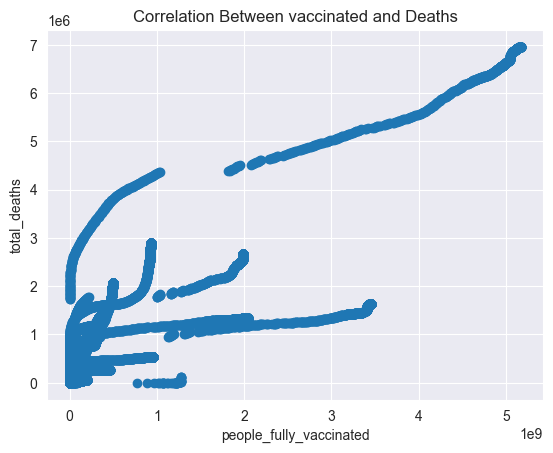

In [18]:
sns.set_style('darkgrid')
plt.scatter(df['people_fully_vaccinated'],df['total_deaths'])
plt.xlabel('people_fully_vaccinated')
plt.ylabel('total_deaths')
plt.title('Correlation Between vaccinated and Deaths')
plt.show()

most_affected_location= df.value_counts('location')

In [19]:
df.new_cases.max()

8401962.0

In [20]:
table1= ['date','new_cases','total_cases_per_million','new_deaths_per_million','icu_patients_per_million','hosp_patients_per_million','weekly_icu_admissions_per_million', 'weekly_hosp_admissions','excess_mortality_cumulative_per_million']

In [21]:
df1=pd.DataFrame(df, columns=table1)

In [22]:
df1

,date,new_cases,total_cases_per_million,new_deaths_per_million,icu_patients_per_million,hosp_patients_per_million,weekly_icu_admissions_per_million,weekly_hosp_admissions,excess_mortality_cumulative_per_million
0,2020-01-03,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2020-01-04,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2020-01-05,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2020-01-06,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,2020-01-07,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
337854,2023-08-26,0.0,16281.386,0.0,NaN,NaN,NaN,NaN,NaN
337855,2023-08-27,0.0,16281.386,0.0,NaN,NaN,NaN,NaN,NaN
337856,2023-08-28,0.0,16281.386,0.0,NaN,NaN,NaN,NaN,NaN
337857,2023-08-29,0.0,16281.386,0.0,NaN,NaN,NaN,NaN,NaN


In [23]:
df1.drop(['date'],axis=1, inplace= True)

In [24]:
df1.fillna(0, inplace=True)

In [25]:
corr1= df1.corr()

In [26]:
corr1

,new_cases,total_cases_per_million,new_deaths_per_million,icu_patients_per_million,hosp_patients_per_million,weekly_icu_admissions_per_million,weekly_hosp_admissions,excess_mortality_cumulative_per_million
new_cases,1.000000,0.010539,0.042302,0.016158,0.009457,0.012779,0.069504,NaN
total_cases_per_million,0.010539,1.000000,0.020689,0.024114,0.072805,0.040145,0.038958,NaN
new_deaths_per_million,0.042302,0.020689,1.000000,0.186329,0.195378,0.180725,0.054014,NaN
icu_patients_per_million,0.016158,0.024114,0.186329,1.000000,0.599636,0.587836,0.344644,NaN
hosp_patients_per_million,0.009457,0.072805,0.195378,0.599636,1.000000,0.282884,0.261762,NaN
weekly_icu_admissions_per_million,0.012779,0.040145,0.180725,0.587836,0.282884,1.000000,0.158597,NaN
weekly_hosp_admissions,0.069504,0.038958,0.054014,0.344644,0.261762,0.158597,1.000000,NaN
excess_mortality_cumulative_per_million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Correlation Matrix of Covid19')

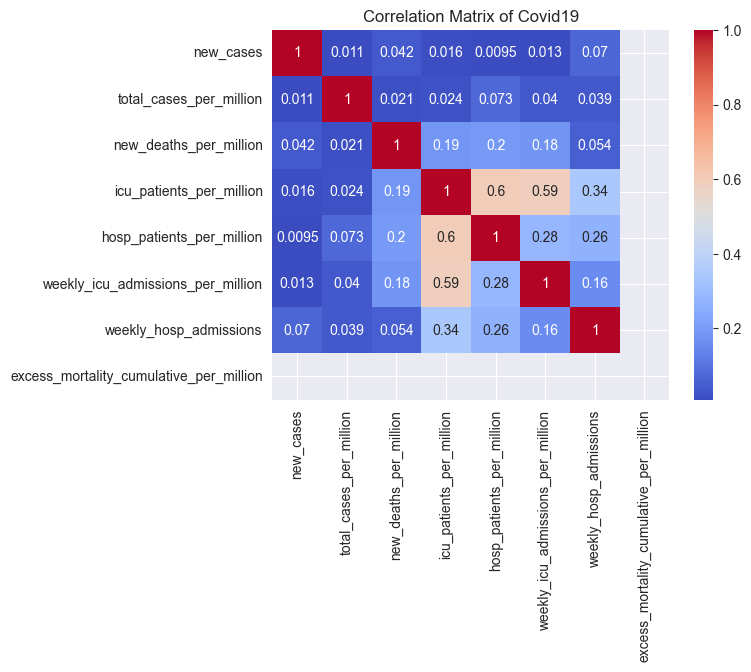

In [27]:
sns.heatmap(corr1, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Covid19")

In [28]:
df.new_cases.max()

8401962.0

In [41]:
table2= df.location.unique()

In [45]:
unique_loc_df = pd.DataFrame({'Unique_loc': table2})

In [46]:
unique_loc_df

,Unique_loc
0,Afghanistan
1,Africa
2,Albania
3,Algeria
4,American Samoa
...,...
250,Western Sahara
251,World
252,Yemen
253,Zambia


In [47]:
unique_loc_df['toatl_Deaths'] = df['total_deaths']

In [48]:
unique_loc_df

,Unique_loc,toatl_Deaths
0,Afghanistan,NaN
1,Africa,NaN
2,Albania,NaN
3,Algeria,NaN
4,American Samoa,NaN
...,...,...
250,Western Sahara,1418.0
251,World,1420.0
252,Yemen,1420.0
253,Zambia,1420.0


In [50]:
most_50 = unique_loc_df['toatl_Deaths'].nlargest(50)

In [55]:
unique_loc_df=unique_loc_df.drop(252)

In [56]:
most_death = unique_loc_df.loc[unique_loc_df['toatl_Deaths'].isin(most_50), 'Unique_loc']

In [59]:
most_5 = unique_loc_df['toatl_Deaths'].nlargest(5)

In [60]:
most_5

251    1420.0
253    1420.0
254    1420.0
250    1418.0
249    1415.0
Name: toatl_Deaths, dtype: float64

In [66]:
most_death_recorded_locations = unique_loc_df.loc[unique_loc_df['toatl_Deaths'].isin(most_5), 'Unique_loc']

In [62]:
most_death_recorded_locations 

249    Wallis and Futuna
250       Western Sahara
251                World
253               Zambia
254             Zimbabwe
Name: Unique_loc, dtype: object

In [64]:
most_death = unique_loc_df.loc[unique_loc_df['toatl_Deaths'].isin(most_5), 'Unique_loc']

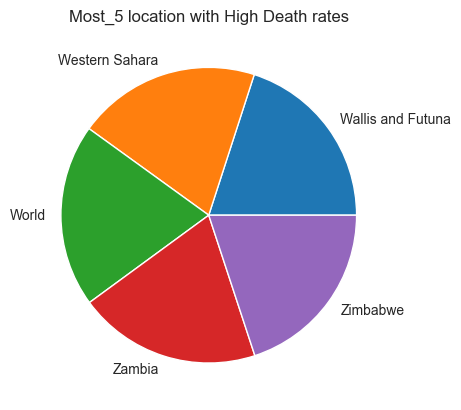

In [71]:
labels=unique_loc_df.loc[unique_loc_df['toatl_Deaths'].isin(most_50), 'Unique_loc']
sizes=unique_loc_df['toatl_Deaths'].nlargest(5)
plt.pie(sizes, labels=labels)
plt.title('Most_5 location with High Death rates')
plt.show()

Text(0, 0.5, 'Death count')

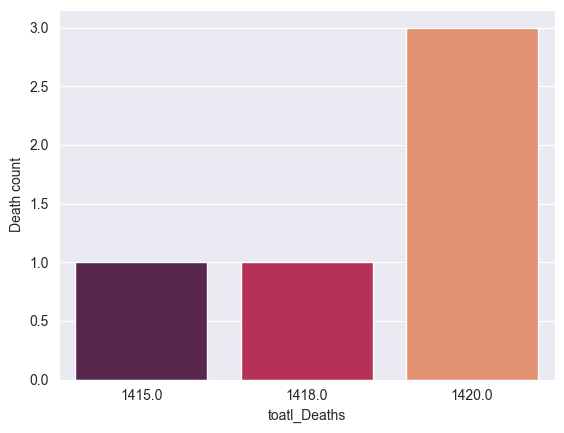

In [79]:
sns.countplot(x=unique_loc_df['toatl_Deaths'].nlargest(5),data=unique_loc_df, palette= 'rocket') 
plt.ylabel('Death count')

<Axes: xlabel='Unique_loc', ylabel='toatl_Deaths'>

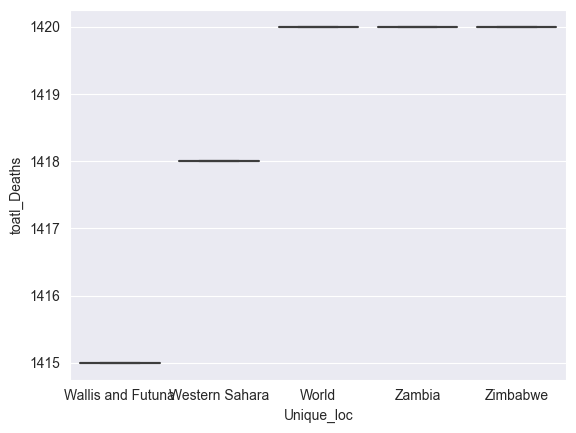

In [81]:
sns.boxplot(x=unique_loc_df.loc[unique_loc_df['toatl_Deaths'].isin(most_50), 'Unique_loc'],y=unique_loc_df['toatl_Deaths'].nlargest(5),data=df)

## **Conclusion

#### Data set anaysis carried out by different stage as you can see such data accessing , data cleaning  and their vishualizationsvia different plots.each vishualization thoroughly examines different value relations . It showcase valueble insights from each vishualizations,as you can see the pie plot showcase most death recoreded locations. and alos we found Sweden was the most  affected location as per their death counts.
